Notas:
--------
Estoy ajustando el grafico KG, para guardarlo en un pdf con todos los graficos correspondientes al canal tradicional
    
- [x] Ajuste KG mensual
- [ ] Variación del precio mensua
- [ ] Variación del precio promedio ponderado
- [ ] Variación del precio promedio ponderado
- [ ] Dispersipon del precio/KG

Passos siguientes:
- Revisar el latex, para entender que pasos seguir
- Modelo de regresión que muestra la dispesión del precio respecto al volumen


# Inicio
__Rename__
Recordar que la columna llamada `Precio promedio` ahora es `Precio`
- Presenta los parametros del modelo
    - Dirección datos
    - Dirección Graficos
    - _Material a analizar_
    - _Canal a analizar_
    - _Zona de los Datos_
    - _Año de inicio de analizis_
- la Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 

In [1]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
"""
#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto


In [2]:
#!jt -l
#!jt -t oceans16 -T

## Intalar paquetes, Abrir data y ajustarla 

### import

In [3]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [4]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [5]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [6]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [7]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
#    start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

### Funciones 
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

In [8]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

## Datos  
Se cargan los datos de
Ventas y la defincion de los productos
Ventas está en `data_v` y despues pasa a ser `data`

Productos estan cargados en `DF_products`


###  DF_FULL

In [9]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Ventas_Full'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

DF_FULL = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict)
#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
DF_FULL.head(1)

,Zona de ventas,Zona de ventas.1,Cliente,Cliente.1,Cliente - Local,Cliente - Local.1,Material,Día natural,Kilos Venta KG,Venta Neta,...,Tipo de material.1,Marca,Nivel 2,Granel/Envasado,Marinado,Nivel 3,Grupo artículos,Estado,Estandar,Envase
0,Z001,Santiago,10003742,Ferrer Leiva Sonia,Ferrer Leiva Sonia,38458,1010077,2018-02-09,12.0,13685.0,...,Prod. Term. Ave,SUPER POLLO (SP),Trutro,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO


#### Funcion

In [10]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    #for i in df.columns.to_list():
    #    df=df[df[i].notna()]

#=================================
# Proceso iterativo Pasar a numero
#=================================

    for i in ['Kilos Venta KG','Venta Neta','Precio Promedio']:
        df[i]=df[i].astype('float64').astype('int64')
        
#=================================
# Agregar nombre al codigo del producto
#=================================
    def material_name(x):
        s1=str(x['Material'])
        s2=str(x['Nivel 4.1'])
        return(s1+'('+s2+')')
    df['Material (Nombre)']=df.apply(lambda x:  material_name(x), axis=1)
    


#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    #Separacion fecha
    
    #df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    #df['Mes']=df["Día natural"].apply(lambda x: x.month)
    #df['Año']=df["Día natural"].apply(lambda x: x.year)
    #df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
    df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
    df=df[df['Día Semana']!='Domingo']
    
    DF_FULL.dtypes
    end_time = time.time()
    time_convert(end_time - start_time)
    return df

### Datos año de inicio
#### Rename

In [11]:
#=====================================
# Aplicacion del ajuste de los datos
#=====================================

data=Ajuste_data(DF_FULL).rename(
    columns={'Precio Promedio':'Precio'})
data[data.Año>=int(Año_inicio)]
data.dtypes

Time Lapsed = 0:0:21.1151225566864 
 H:m:s


Zona de ventas          object
Zona de ventas.1        object
Cliente                 object
Cliente.1               object
Cliente - Local         object
Cliente - Local.1       object
Material                object
Día natural             object
Kilos Venta KG           int64
Venta Neta               int64
Precio                   int64
Frecuencia Historica    object
Centro                  object
Centro.1                object
Población               object
Tipo de cliente         object
Cluster                 object
Segmento                object
Segmento.1              object
Categoría Cliente       object
Zona de reparto         object
Año Creación            object
Material Favorito       object
Semana                  object
Mes                     object
Año                      int64
Nivel 4                 object
Nivel 4.1               object
Sector                  object
Tipo de material        object
Tipo de material.1      object
Marca                   object
Nivel 2 

In [12]:
#=============================
# Se eliminaron los regristros donde existen dias domingos
#(No hay despacho los dias domingos)
#============================

data.shape[0] - DF_FULL.shape[0]

-256

# Selección data(Canal/material)
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

## data 

In [13]:
#==============================
# Se define el producto
#==============================
i_producto=Y_producto
data_i=data[
    (data['Tipo de cliente']==Tipo_de_Cliente)
    &(data.Material==i_producto)
].copy()


### Columnas a usar 
rename aplicado a `Precio promedio`

In [14]:
#=======================================================================================================
                                                # Columnas a usar
#========================================================================================================

data_i=data_i[[
                    #======================================   
                                    # Base de la venta
                    #--------------------------------------

'Material (Nombre)',
    #ID Nombre
    
#========================
#Cantidad/Ingreso/Precio
#------------------------
'Kilos Venta KG',
#'Venta Neta', No es necesario o de interes para la prediccion
'Precio',

#========================
#fecha
#------------------------
#'Día natural', #Se descarta por series de tiempo
    # Ver si funciona

'Día Semana',
    #lun, Mart, Mier, Juev
'Semana',
    #1, 2 , 3 ,..., 52, 53
'Mes',
    #1,2,3,...,12
'Año',
    #2018,2019,...,2021
    
    

#______________________________________________________________________
                        
                                    # CLIENTE
    
#=====================================
#Ubicacion del cliente
#-------------------------------------
'Población', #'Zona de reparto',
#Comuna del Cliente ; Codigo de la zona de reparto
#[No son excluyentes, la Zona de reparto
#Es más especifica y agrupa a clientes]


                #Region
                #'Zona de ventas',
                #'Zona de ventas.1',
                    #(Z001: Santiago)

#Es atendido por la sucursal:
'Centro.1', #'Centro', 
    #ID Sucursal, Nombre Sucursal(oficina o centro)
    
#=========================================    
#Identificacion del cliente
#---------------------------------------
'Cliente', #'Cliente.1',
     #ID del cliente , #nombre del cliente
 #'Cliente - Local', 'Cliente - Local.1'
     # Tambien funciona como ID
         #ID, Nombre

    #Agrupacion del cliente
    #'Tipo de cliente', #SON TODOS IGUALES
    'Cluster', 
         #Canal del cliente ; Tipo de cliente
             #Tradicional   ; Clasico

    #Nivel de cobertura
    #'Segmento', 
     'Segmento.1',
     #codigo ; nombre
         #50 ; Cobertura pequeno SD
    'Categoría Cliente',
            #Especialista en Proc


    #===================================================
    #Caracteristicas Adiocinales a su consumo
    #-------------------------------------------------
        'Año Creación',
            #Fecha de afiliación a Agrosuper
             #-> Debe ser INT idealmente

        'Material Favorito',
             #ID del producto que ha comprado más frecuentemente
             #(No por cantidad, si no que por cantidad de compras realizadas)
                 #-> Puede ser solo el codigo o el nombre tambien

        'Frecuencia Historica',
             #Cantidad de compras realizadas desde el 2018
                 #-> debe ser INT
                     #-> constante para todas las compras
                            # Al ser variable complejiza todo
 
]]
data_i['Frecuencia Historica']=data_i['Frecuencia Historica'].astype('int64')
data_i['Año Creación']=data_i['Año Creación'].astype('int64')

In [15]:

print('Data Full',DF_FULL.shape)
print(data.shape[0]-DF_FULL.shape[0],
      data.shape[1]-DF_FULL.shape[1])
print('Data Año',data.shape)
print(data_i.shape[0]-data.shape[0],
      data_i.shape[1]-data.shape[1])
print('Data Año, Canal Producto',data_i.shape)

Data Full (1061161, 40)
-256 2
Data Año (1060905, 42)
-862309 -26
Data Año, Canal Producto (198596, 16)


In [16]:
desc=data_i.describe(include='all').reset_index()
desc[desc['index']=='unique']

,index,Material (Nombre),Kilos Venta KG,Precio,Día Semana,Semana,Mes,Año,Población,Centro.1,Cliente,Cluster,Segmento.1,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica
1,unique,1,NaN,NaN,6,53,12,NaN,46,3,5073,3,3,5,NaN,13,NaN


### Dicionario 
rename aplicado a `Precio promedio`

In [17]:
Dic_col={
        'Fecha':
                             ['Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Población', 'Centro.1'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica']
         ,'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente']
        }

In [18]:
#List sirve para definir las columnas de interes para los datos
list_=[]
for i in Dic_col:
    list_+=Dic_col[i]
print(len(list_))

16


###### __Rename__

```python
#data_i[Dic_col['Base']]
data_i.rename(
    columns={'Precio Promedio':'Precio'}, errors="raise")
data_i[Dic_col['Base']]
```

# Variacion precio mes
Material Precios y volumen por venta


__Boxplot__ mensuales y semanales, con los diferentes años, de esta forma se superponen los años en un mismo mes 


Se estan usando todos los datos para estos graficos 

## Grafico 

##### Función Graficos

`custom_date_format1` define los meses en un rango enumerado, para el eje X
`Mes_name` Entrega el nombre del mes, cuando se entrega el numero

In [19]:
i=Y_producto
T_i=Tipo_de_Cliente

In [20]:

def custom_date_format1(breaks):
    """
    Function to format the date
    """
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    Month_dic={i:D[i-1]  for i in range(1,13)}
    return [Month_dic[x.month] if  x.day==1 else "" for x in breaks]


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])


### KG mensual 

Se presentarán varioas demandas
- [ ] La simple,que cada pounto es una facturación
- [ ] una promedio, de cada cliente de forma mensual.
- [ ] la total del mes que consume cada cliente.
- [ ] la total del mes/Año que consume cada cliente.

##### Data Grafico 
`df Material=i & Canal = T_i`
`Año categorico, mes name`

Se trabajará la demanda promedio de cada cliente mensualmente.

Cuidado, cuando se utilizan variables que cambian en un for, porque pueden cambiar los valores objetivos principales del estudio

In [80]:
Y_producto

'1010078'

In [81]:
T_i

'Industriales'

In [ ]:
data[(data['Material']==i)

In [72]:
data.shape

(1060905, 42)

In [73]:
data_i.shape

(73, 43)

In [92]:
#======================================
# Kilos de venta
#======================================
data_i=data[(data['Material']==Y_producto) &
                    (data['Tipo de cliente']==Tipo_de_Cliente) #&
                                 ].copy()#data
print(data_i.shape)
data_i.Año=data_i.Año.astype('category')
print(data_i.Año.dtype)
data_i['Mes_num']=data_i["Mes"]#.apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i['Mes']=data_i["Mes_num"].apply(lambda x: Mes_name(x))
print(data_i.shape)
data_i[['Mes','Mes_num','Día natural']].head()
print(data_i.shape)
data_i.head()

(198596, 42)
category
(198596, 43)
(198596, 43)
(198596, 43)


,Zona de ventas,Zona de ventas.1,Cliente,Cliente.1,Cliente - Local,Cliente - Local.1,Material,Día natural,Kilos Venta KG,Venta Neta,...,Granel/Envasado,Marinado,Nivel 3,Grupo artículos,Estado,Estandar,Envase,Material (Nombre),Día Semana,Mes_num
61455,Z001,Santiago,10003742,Ferrer Leiva Sonia,Ferrer Leiva Sonia,38458,1010078,2020-05-23,22,28795,...,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO,1010078(Trutro Entero Selección),Sábado,5
61456,Z001,Santiago,10007508,Curin Curamil Juan Francisco,Curin Juan Francisco,38506,1010078,2018-03-01,110,129140,...,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO,1010078(Trutro Entero Selección),Jueves,3
61457,Z001,Santiago,10007508,Curin Curamil Juan Francisco,Curin Juan Francisco,38506,1010078,2018-03-08,66,77484,...,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO,1010078(Trutro Entero Selección),Jueves,3
61458,Z001,Santiago,10007508,Curin Curamil Juan Francisco,Curin Juan Francisco,38506,1010078,2018-03-20,66,68044,...,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO,1010078(Trutro Entero Selección),Martes,3
61459,Z001,Santiago,10007508,Curin Curamil Juan Francisco,Curin Juan Francisco,38506,1010078,2018-03-27,65,70950,...,GRANEL,MARINADO,Trutro Entero,01050,REFRIGERADO,PESO VARIABLE,NO CONGELADO,1010078(Trutro Entero Selección),Martes,3


###### Group 

In [51]:
data_i.columns

Index(['Zona de ventas', 'Zona de ventas.1', 'Cliente', 'Cliente.1',
       'Cliente - Local', 'Cliente - Local.1', 'Material', 'Día natural',
       'Kilos Venta KG', 'Venta Neta', 'Precio', 'Frecuencia Historica',
       'Centro', 'Centro.1', 'Población', 'Tipo de cliente', 'Cluster',
       'Segmento', 'Segmento.1', 'Categoría Cliente', 'Zona de reparto',
       'Año Creación', 'Material Favorito', 'Semana', 'Mes', 'Año', 'Nivel 4',
       'Nivel 4.1', 'Sector', 'Tipo de material', 'Tipo de material.1',
       'Marca', 'Nivel 2', 'Granel/Envasado', 'Marinado', 'Nivel 3',
       'Grupo artículos', 'Estado', 'Estandar', 'Envase', 'Material (Nombre)',
       'Día Semana', 'Mes_num'],
      dtype='object')

In [54]:
data_i.groupby(['Año','Mes','Cliente']).mean()

Kilos Venta KG  Venta Neta  Precio
Año  Mes        Cliente                                     
2018 Abril      13480396             NaN         NaN     NaN
                6486982              NaN         NaN     NaN
                76375977             NaN         NaN     NaN
                76609378             NaN         NaN     NaN
                76647239             NaN         NaN     NaN
...                                  ...         ...     ...
2021 Septiembre 76647239             NaN         NaN     NaN
                76839653             NaN         NaN     NaN
                76876615             NaN         NaN     NaN
                77146133            22.0     64071.0  2890.0
                77233762             NaN         NaN     NaN

[432 rows x 3 columns]

In [85]:
data_i.shape

(198596, 43)

In [86]:
data_i.Cliente=data_i.Cliente.astype('category')


In [87]:
len(data_i.Cliente.unique())
len(data_i.Cliente)

198596

In [88]:
data_i.Cliente.cat.remove_unused_categories()

61455     10003742
61456     10007508
61457     10007508
61458     10007508
61459     10007508
            ...   
297036     9994662
297037     9994800
297038     9994800
297039     9994800
297040     9997223
Name: Cliente, Length: 198596, dtype: category
Categories (5073, object): ['10003742', '10007508', '10017269', '10023880', ..., '9993925', '9994662', '9994800', '9997223']

In [91]:

data_i.groupby(['Año','Mes','Cliente']).mean()

Kilos Venta KG     Venta Neta       Precio
Año  Mes        Cliente                                             
2018 Abril      10003742             NaN            NaN          NaN
                10007508       66.000000   79200.000000  1200.000000
                10017269       22.000000   28006.000000  1273.000000
                10023880             NaN            NaN          NaN
                10028999             NaN            NaN          NaN
...                                  ...            ...          ...
2021 Septiembre 9992154              NaN            NaN          NaN
                9993925       200.416667  289104.083333  1420.833333
                9994662        22.000000   26132.000000  1190.000000
                9994800              NaN            NaN          NaN
                9997223              NaN            NaN          NaN

[243504 rows x 3 columns]

##### Grafico 

###### Grafico Codigo 

Cuidado, no se puede aplicar un filtro y una modificación al mismo tiempo, ya que se tienen difernetes dimenciones.

Tradicional
1010078 Trutro Entero Selección


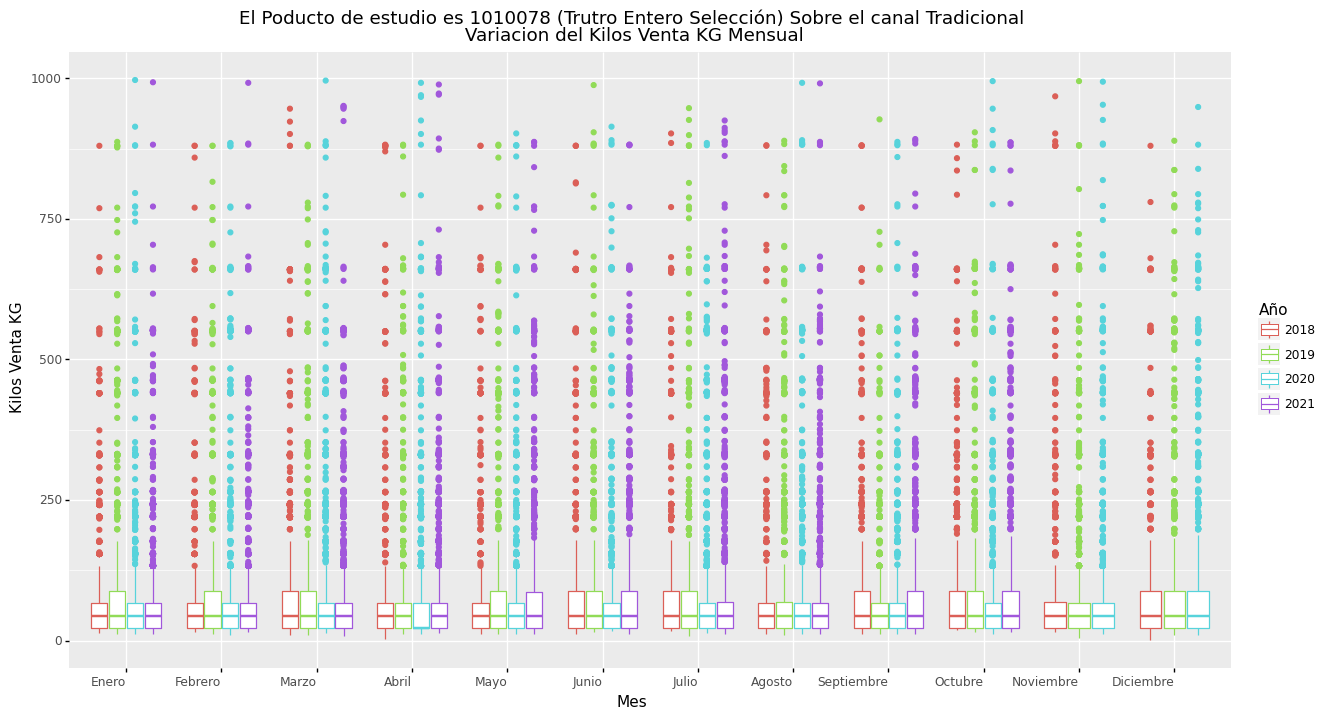

<ggplot: (137876696561)>

In [47]:
#+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)
s=df[df.Material==i]['Nivel 4.1'].unique()[0]
Y_Graph='Kilos Venta KG'

print(T_i)
print(i,s)

Graph_KG_mes=(
ggplot(
    df[(df['Kilos Venta KG']<1000)]
    ,aes(
        x='Mes',#df["Mes"].apply(lambda x: Mes_name(x) ),
        y= Y_Graph ,
        color='Año' ))\
+ geom_boxplot()


    +ggtitle('El Poducto de estudio es '+i+' ('+s+')'+ ' Sobre el canal '+ T_i
                 +'\n Variacion del '+Y_Graph + ' Mensual')
 +theme(axis_text_x = element_text(hjust=1),figure_size=(15,8)) 
 +scale_x_discrete(limits= ['Enero','Febrero','Marzo','Abril',
'Mayo','Junio','Julio','Agosto',
'Septiembre','Octubre',
'Noviembre','Diciembre'])
)
Graph_KG_mes

###### Grafico plot 

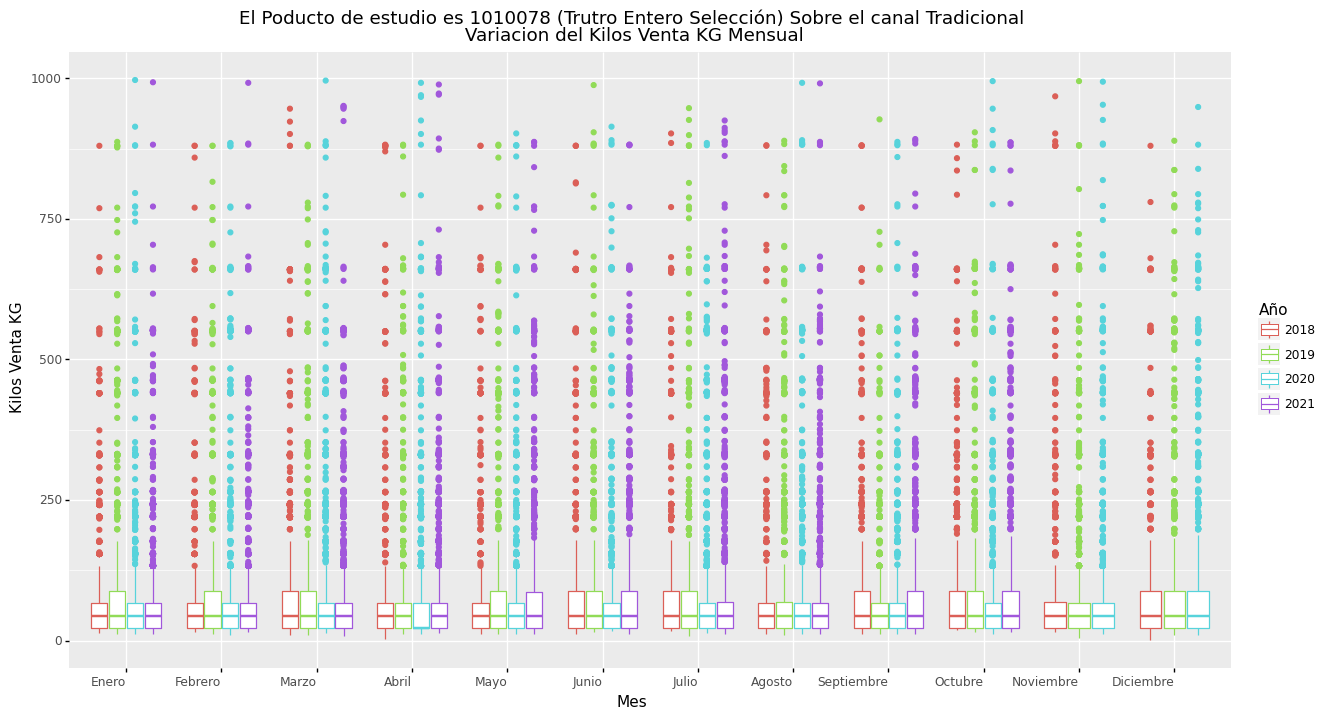

<ggplot: (137876696561)>

In [48]:
Graph_KG_mes

#### PDF save

```python
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(list_Graph_KG_mes
                  ,file_direct_Graphic+'/'+Y_producto+"/Boxplot Mensual Kilos Venta.pdf")
time_convert(time.time()-start_time)
```

### Precio mensual 

In [ ]:
#======================================
# Precio de venta Iterativo
#======================================

#----------------------------------------
# funcion que define los quiebres
#--------------------------------------------------------------------



#======================================
# Precio de venta Iterativo
#======================================
Y_Graph='Precio'

list_Graph_precio_mes=[]
for T_i in data['Tipo de cliente'].unique():
    print(T_i)
    for i in data.Material.unique():
        # Dataframe
        df=data.loc[(data['Material']==i) &
                            (data['Tipo de cliente']==T_i)
                      ].copy()#data
        # Nombre del producto
        s=df[df.Material==i]['Nivel 4.1'].unique()[0]

        
        print(i,s)
        
        #-------------------------------------------------
        # Grafico
        list_Graph_precio_mes.append(ggplot(df
                ,aes(
                    x=df["Mes"].apply(lambda x: Mes_name(x) ),
                    y= Y_Graph ,color='Año' ))\
            + geom_boxplot()
              #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

             +ggtitle('El Poducto de estudio es '+i+' ('+s+')'+ ' Sobre el canal '+ T_i
                     +'\n Variacion del '+Y_Graph + ' Mensual'
                     )
             +theme(axis_text_x = element_text(#angle=90,
                                               hjust=1),figure_size=(15,8))
                + scale_x_discrete(
                        limits= 
                        ['Enero','Febrero','Marzo','Abril',
                        'Mayo','Junio','Julio','Agosto',
                        'Septiembre','Octubre',
                        'Noviembre','Diciembre'])
        )

In [ ]:
list_Graph_precio_mes

#### PDF save

In [ ]:
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(list_Graph_precio_mes
                  ,file_direct_Graphic+'/'+Y_producto+"/Boxplot Mensual Precio.pdf")
time_convert(time.time()-start_time)

### Semanal 

In [ ]:
#======================================
# Una iteracion
#======================================

i=Y_producto
T_i=Tipo_de_Cliente

Y_Graph='Precio'

def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])


#=============================
# Data
#=============================
df=data.loc[(data['Material']==i) &
                    (data['Tipo de cliente']==T_i) 
               #&(data['Kilos Venta KG']<1000)
              ].copy()#data
#df.head()

"""
df['Mes_num']=df["Mes"]#.apply(lambda x: Mes_name(x))
df['Mes']=df["Mes_num"].apply(lambda x: Mes_name(x))
df[['Mes','Mes_num','Día natural']].head()
"""
df.Semana=df['Semana'].astype('category')
df.Mes=df.Mes.apply(Mes_name) 

s=df[df.Material==i]['Nivel 4.1'].unique()[0]

print(T_i)
print(i,s)

Graph=(ggplot(df
        ,aes(
            x='Semana',#.astype('category'),
            y= Y_Graph 
            ,color='Mes'
        ))\
    + geom_boxplot()
      #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

     +ggtitle('El Poducto de estudio es '+Y_producto+' Sobre el canal '+ Tipo_de_Cliente
             +'\n Variacion del '+Y_Graph + ' Semanal'
             )
     +theme(axis_text_x = element_text(#angle=90,
                                       hjust=1),figure_size=(25,8))
     +facet_grid('Año~.')
)


In [ ]:
Graph

#### Iter

In [ ]:
#======================================
# Una iteracion
#======================================
"""
i=Y_producto
T_i=Tipo_de_Cliente
"""
Y_Graph='Precio'

def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])


List_boxplor_week=[]
for T_i in data['Tipo de cliente'].unique():
    print( ''.join(['-' for j in range(1,20)]))
    print(T_i)
    for i in data.Material.unique():
        #=============================
        # Data
        #=============================
        df=data.loc[(data['Material']==i) &
                            (data['Tipo de cliente']==T_i) 
                       #&(data['Kilos Venta KG']<1000)
                      ].copy()#data

        df.Semana=df['Semana'].astype('category')
        df.Mes=df.Mes.apply(Mes_name) 

        s=df[df.Material==i]['Nivel 4.1'].unique()[0]

        print(i,s)

        List_boxplor_week.append(ggplot(df
                ,aes(
                    x='Semana',#.astype('category'),
                    y= Y_Graph 
                    ,color='Mes'
                ))\
            + geom_boxplot()
              #+scale_x_datetime(breaks=date_breaks('1 month') ,labels=custom_date_format1)

             +ggtitle('El Poducto de estudio es '+i+' Sobre el canal '+ T_i
                     +'\n Variacion del '+Y_Graph + ' Semanal'
                     )
             +theme(axis_text_x = element_text(#angle=90,
                                               hjust=1),figure_size=(25,8))
             +facet_grid('Año~.')
        )


#### PDF save

```python
#============================
# Se guardan variaciones lineales
#============================
start_time = time.time()
save_as_pdf_pages(List_boxplor_week
                  ,file_direct_Graphic+'/'+Y_producto+"/Boxplot Semanal Precio.pdf")
time_convert(time.time()-start_time)
```

# Precio volumen 

Como son graficos de dispersion, puede que no sea conveniente evualuar a cada uno de los canales, por lo cual se procede a atacar al canal tradicional.

In [ ]:
df=data[data.Material== Y_producto]\
.copy()


In [ ]:
df_group_kg = (
    DF_Full\
[['Cliente','Material Nombre','Tipo de cliente',
  'Kilos Venta KG' ,'Precio'
  ]]\
.groupby(['Tipo de cliente','Cliente']
                      ).mean().reset_index()
)

df_group_kg.groupby(['Tipo de cliente']).describe().reset_index()
b

In [ ]:
p=ggplot(
    df_group_kg
        ,aes(
            x='Kilos Venta KG',
            y= 'Precio'
            ,color='Tipo de cliente'
        ))\
    + geom_point(alpha=0.6)


### Png Save


```python
ggsave(filename = None, plot = None, device = None, format = None,
               path = None, scale = 1, width = None, height = None, units = "in",
               dpi = 300, limitsize=True, **kwargs)
```

In [ ]:
file_name='Dispersión precios Volumen'
ggsave(plot = p,
       filename = file_name, 
       path =file_direct_Graphic+'/'+Y_producto
      ,dpi = 300
      )
